In [ ]:
!pip install ics@git+https://github.com/ics-py/ics-py.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.7/184.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
import requests
import datetime
from ics import Calendar, Timezone
from ics.timespan import NormalizationAction

In [ ]:
text = requests.get("CALENDAR ICS URL HERE").text
calendar = Calendar(text)

calendar.normalize(
    Timezone.from_tzid("Asia/Tehran"),
    normalize_floating=NormalizationAction.REPLACE,
    normalize_with_tz=NormalizationAction.CONVERT)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = []

for event in calendar.events:
  data.append({
      'summary': event.summary or '',
      'begin': event.begin.strftime('%Y/%m/%d %H:%M:%S'),
      'end': event.end.strftime('%Y/%m/%d %H:%M:%S'),
  })

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,summary,begin,end
0,حلی سنج,2023/10/05 07:00:00,2023/10/05 12:00:00
1,تمرین عربی درس ۱,2023/10/05 18:00:00,2023/10/05 19:30:00
2,شیمی تکمیل جزوه آرایش الکترونی,2023/10/05 14:00:00,2023/10/05 15:00:00
3,رفت به مدرسه,2023/10/04 06:15:00,2023/10/04 07:15:00
4,رفت به مدرسه,2023/09/30 06:15:00,2023/09/30 07:15:00


In [ ]:
df['begin'] = pd.to_datetime(df['begin'], format='mixed')
df['end'] = pd.to_datetime(df['end'], format='mixed')

In [ ]:
df.head()

,summary,begin,end
0,حلی سنج,2023-10-05 07:00:00,2023-10-05 12:00:00
1,تمرین عربی درس ۱,2023-10-05 18:00:00,2023-10-05 19:30:00
2,شیمی تکمیل جزوه آرایش الکترونی,2023-10-05 14:00:00,2023-10-05 15:00:00
3,رفت به مدرسه,2023-10-04 06:15:00,2023-10-04 07:15:00
4,رفت به مدرسه,2023-09-30 06:15:00,2023-09-30 07:15:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   summary  1852 non-null   object        
 1   begin    1852 non-null   datetime64[ns]
 2   end      1852 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 43.5+ KB


In [ ]:
!pip install wordcloud-fa -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.9/458.9 kB 23.4 MB/s eta 0:00:00


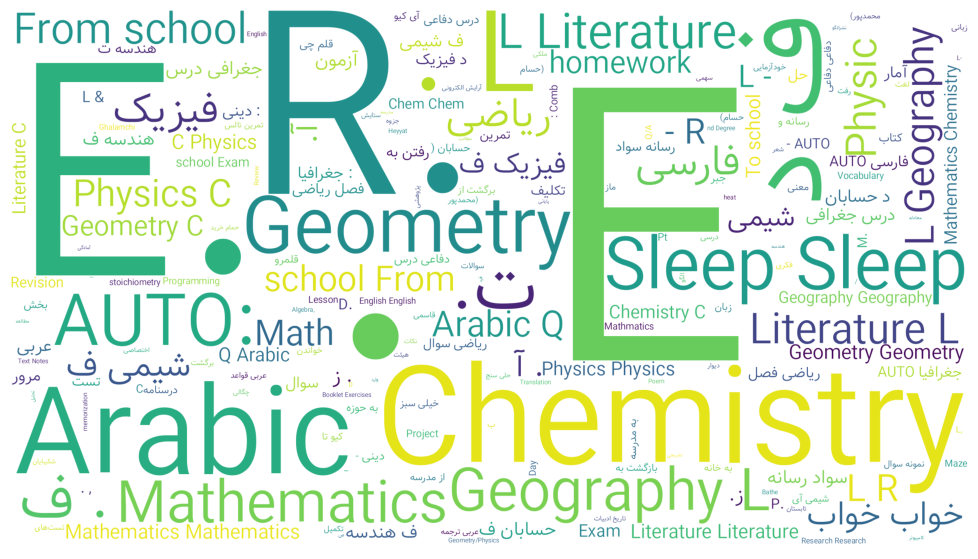

In [ ]:
from wordcloud_fa import WordCloudFa

import matplotlib.pyplot as plt

text = df.summary.str.cat(sep=' ')
wordcloud = WordCloudFa(persian_normalize=True, include_numbers=False,
                        no_reshape=True, background_color="white", width=1024 * 2, height=576 * 2)
frequencies = wordcloud.process_text(text)
wc = wordcloud.generate_from_frequencies(frequencies)
plt.figure(figsize=(14, 7))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
from typing import Dict, List

CATEGORY_MAPPINGS: Dict[str, List[str]] = {
    'geometry': ['هندسه', 'geometry'],
    'math': ['ریاضی', 'math', 'حساب'],
    'chemistry': ['شیمی', 'chem'],
    'physics': ['فیزیک', 'phy'],
    'statistics': ['آمار', 'stat'],
    'sleep': ['خواب', 'sleep'],
    'religious education': ['r. e', 'دینی', 're'],
    'arabic': ['arabic', 'عرب'],
    'persian literature': ['literature', 'persian', 'farsi', 'فارسی', 'ادبیات', 'قلمرو', 'لغت'],
    'geography': ['جغرافی', 'geography'],
    'exam': ['exam', 'امتحان', 'آزمون', 'سنج', 'ماز', 'قلم', 'maze', 'sanj', ],
    'english': ['زبان', 'english'],
    'travel': ['school', 'مدرسه', 'برگشت', 'رفت', 'to', 'from', 'بازگشت'],
    'media literacy': ['سواد', 'm. e'],
    'defense education': ['دفاع', 'd. e']
}

def categorize(text: str) -> str:
    text = text.lower().strip()

    for category, keywords in CATEGORY_MAPPINGS.items():
        if any(keyword in text for keyword in keywords):
            return category

    return 'other'

df['category'] = df['summary'].apply(categorize).astype('category')

In [ ]:
df['duration'] = df['end'] - df['begin']

In [ ]:
df

,summary,begin,end,category,duration
0,حلی سنج,2023-10-05 07:00:00,2023-10-05 12:00:00,exam,0 days 05:00:00
1,تمرین عربی درس ۱,2023-10-05 18:00:00,2023-10-05 19:30:00,arabic,0 days 01:30:00
2,شیمی تکمیل جزوه آرایش الکترونی,2023-10-05 14:00:00,2023-10-05 15:00:00,chemistry,0 days 01:00:00
3,رفت به مدرسه,2023-10-04 06:15:00,2023-10-04 07:15:00,travel,0 days 01:00:00
4,رفت به مدرسه,2023-09-30 06:15:00,2023-09-30 07:15:00,travel,0 days 01:00:00
...,...,...,...,...,...
1847,هندسه ت.آ. ف۱ د۲,2024-08-16 14:30:00,2024-08-16 15:30:00,geometry,0 days 01:00:00
1848,هندسه ت.آ. ف۱ د۲,2024-08-16 20:00:00,2024-08-16 21:00:00,geometry,0 days 01:00:00
1849,فیزیک ت.ز. ف۱,2024-08-16 15:45:00,2024-08-16 16:45:00,physics,0 days 01:00:00
1850,شیمی ت.آ. ۶۰ تا ۱۲۳,2024-08-16 17:30:00,2024-08-16 19:00:00,chemistry,0 days 01:30:00


In [ ]:
# Extracting new features
df['day_of_week'] = df['begin'].dt.day_name()
df['month_of_year'] = df['begin'].dt.month_name()

df['season_of_year'] = df['begin'].dt.month % 12 // 3 + 1
df['season_of_year'] = df['season_of_year'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}).astype('category')

df['season_of_year']
df['hour_of_day'] = df['begin'].dt.hour
df['duration_hours'] = df['duration'].dt.total_seconds() / 3600

In [ ]:
df = df[df['duration_hours'] < 10]
df = df[df['begin'].dt.year > 2020]

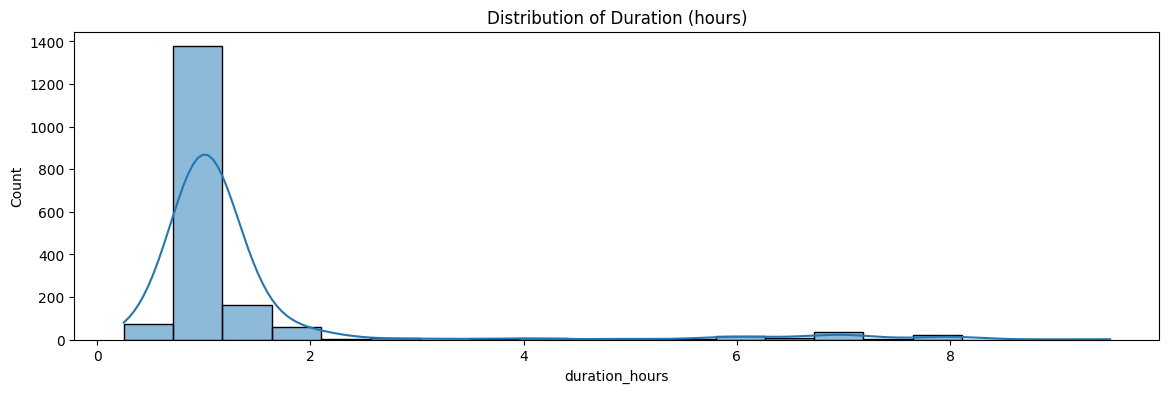

In [ ]:
plt.figure(figsize=(14, 4))
sns.histplot(df['duration_hours'], bins=20, kde=True)
plt.title('Distribution of Duration (hours)')
plt.show()

<ipython-input-19-f5561ba08dcc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')


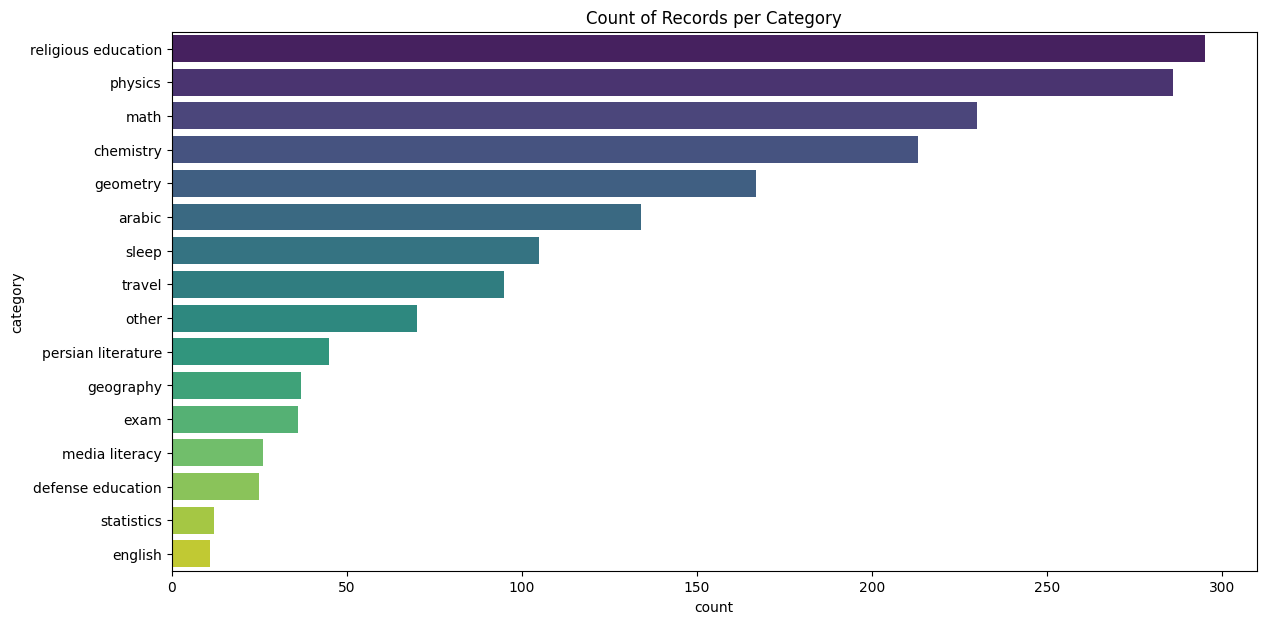

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, palette='viridis')
plt.title('Count of Records per Category')
plt.show()

<ipython-input-20-533a547919e9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_time = df.groupby('category')['duration_hours'].sum().reset_index()
<ipython-input-20-533a547919e9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_hours', y='category', data=category_time, palette='viridis', order=category_time['category'])


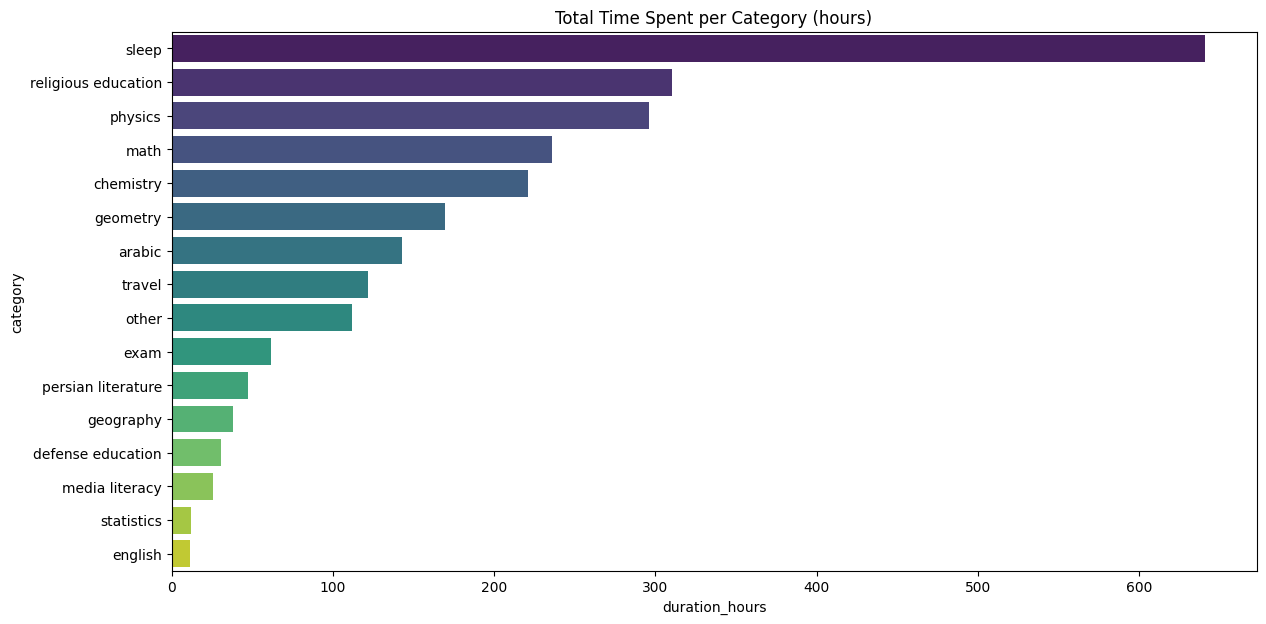

In [ ]:
category_time = df.groupby('category')['duration_hours'].sum().reset_index()
category_time = category_time.sort_values(by='duration_hours', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='duration_hours', y='category', data=category_time, palette='viridis', order=category_time['category'])
plt.title('Total Time Spent per Category (hours)')
plt.show()

<ipython-input-21-959717103306>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='duration_hours', y='day_of_week', data=day_time, palette='viridis')


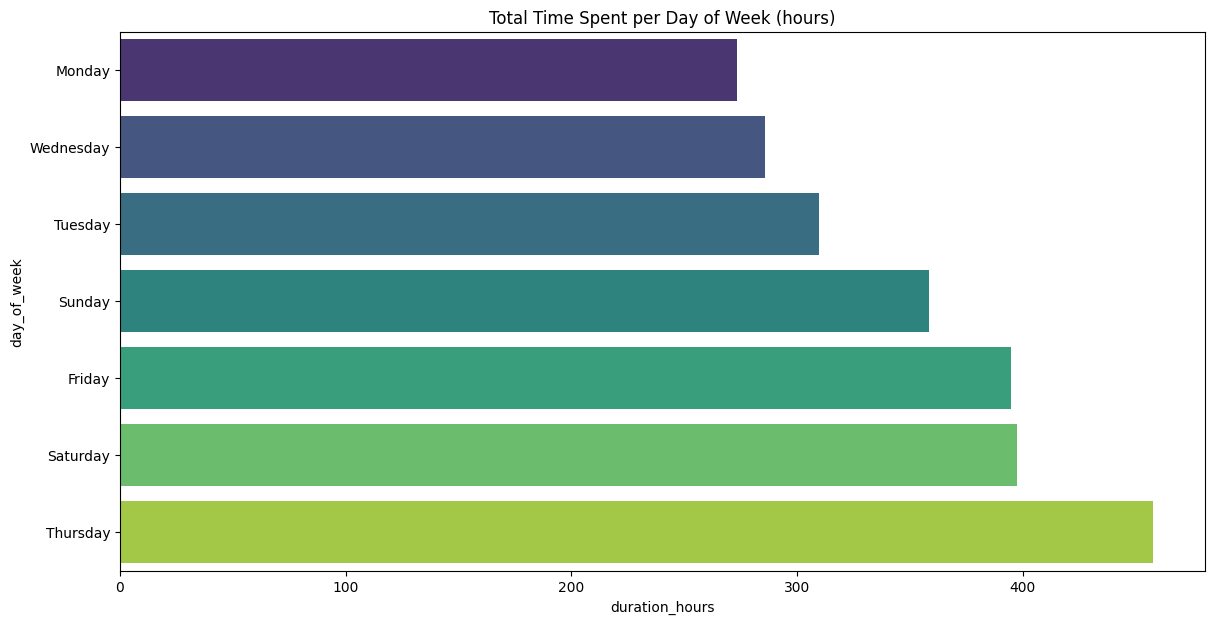

In [ ]:
day_time = df.groupby('day_of_week')['duration_hours'].sum().reset_index()
day_time = day_time.sort_values(by='duration_hours', ascending=True)

plt.figure(figsize=(14, 7))
sns.barplot(x='duration_hours', y='day_of_week', data=day_time, palette='viridis')
plt.title('Total Time Spent per Day of Week (hours)')
plt.show()

<ipython-input-22-2afcdeca7354>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_duration = df.groupby('day_type')['duration_hours'].sum()
<ipython-input-22-2afcdeca7354>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=normalized_duration.index, y=normalized_duration.values, palette='viridis')


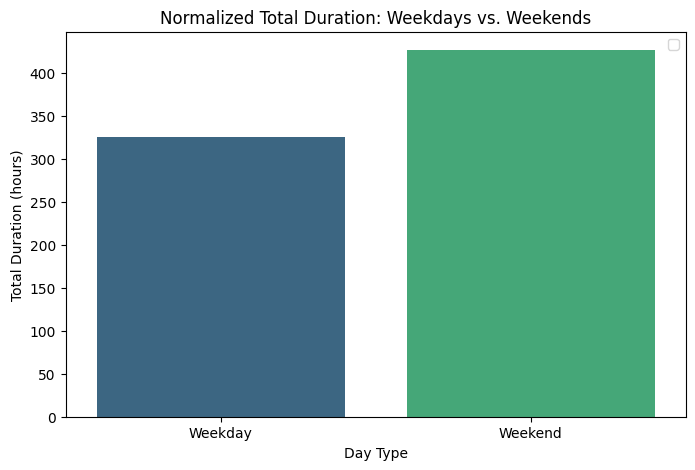

In [ ]:
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Thursday', 'Friday'] else 'Weekday').astype('category')

total_duration = df.groupby('day_type')['duration_hours'].sum()
normalized_duration = total_duration / [5, 2]

plt.figure(figsize=(8, 5))
sns.barplot(x=normalized_duration.index, y=normalized_duration.values, palette='viridis')
plt.title('Normalized Total Duration: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Total Duration (hours)')
plt.legend()
plt.show()

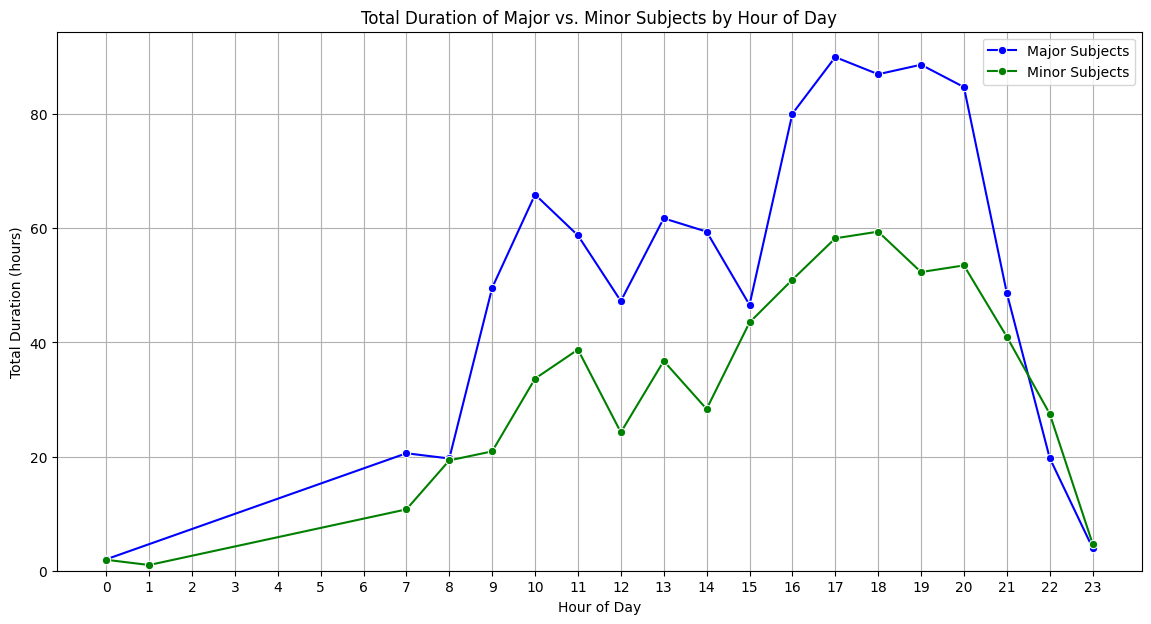

In [ ]:
major_subjects = ['geometry', 'math', 'chemistry', 'physics', 'statistics']
minor_subjects = ['religious education', 'arabic', 'persian literature', 'geography', 'english', 'media literacy', 'defense education']

major_df = df[df['category'].isin(major_subjects)]
minor_df = df[df['category'].isin(minor_subjects)]

major_hourly_duration = major_df.groupby('hour_of_day')['duration_hours'].sum()
minor_hourly_duration = minor_df.groupby('hour_of_day')['duration_hours'].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=major_hourly_duration.index, y=major_hourly_duration.values, marker='o', color='blue', label='Major Subjects')
sns.lineplot(x=minor_hourly_duration.index, y=minor_hourly_duration.values, marker='o', color='green', label='Minor Subjects')
plt.title('Total Duration of Major vs. Minor Subjects by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Total Duration (hours)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()

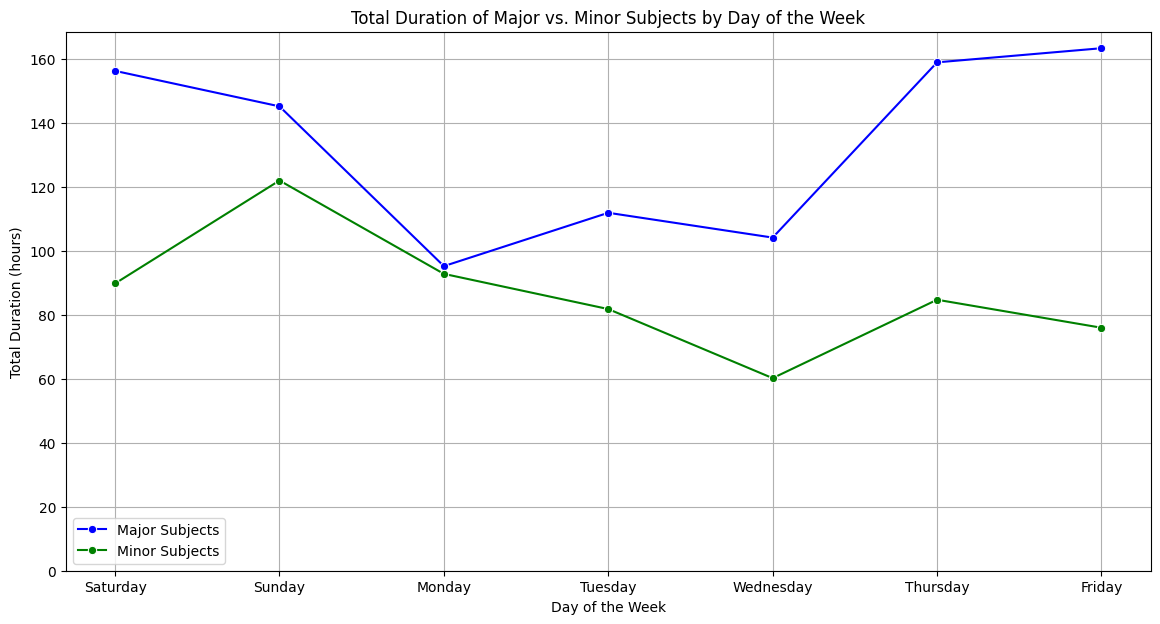

In [ ]:
major_weekly_duration = major_df.groupby('day_of_week')['duration_hours'].sum()
minor_weekly_duration = minor_df.groupby('day_of_week')['duration_hours'].sum()

days_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
major_weekly_duration = major_weekly_duration.reindex(days_order)
minor_weekly_duration = minor_weekly_duration.reindex(days_order)

plt.figure(figsize=(14, 7))
sns.lineplot(x=major_weekly_duration.index, y=major_weekly_duration.values, marker='o', color='blue', label='Major Subjects')
sns.lineplot(x=minor_weekly_duration.index, y=minor_weekly_duration.values, marker='o', color='green', label='Minor Subjects')
plt.title('Total Duration of Major vs. Minor Subjects by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Duration (hours)')
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()

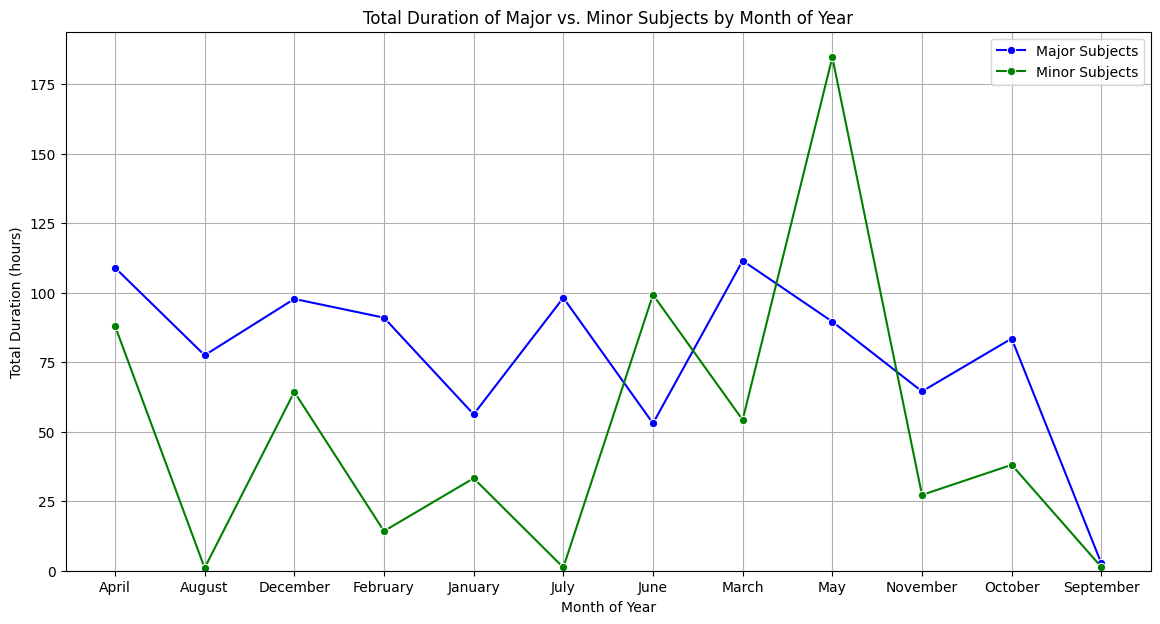

In [ ]:
major_weekly_duration = major_df.groupby('month_of_year')['duration_hours'].sum()
minor_weekly_duration = minor_df.groupby('month_of_year')['duration_hours'].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=major_weekly_duration.index, y=major_weekly_duration.values, marker='o', color='blue', label='Major Subjects')
sns.lineplot(x=minor_weekly_duration.index, y=minor_weekly_duration.values, marker='o', color='green', label='Minor Subjects')
plt.title('Total Duration of Major vs. Minor Subjects by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Total Duration (hours)')
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()

<ipython-input-26-5d0ca43e5a10>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  major_weekly_duration = major_df.groupby('season_of_year')['duration_hours'].sum()
<ipython-input-26-5d0ca43e5a10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  minor_weekly_duration = minor_df.groupby('season_of_year')['duration_hours'].sum()


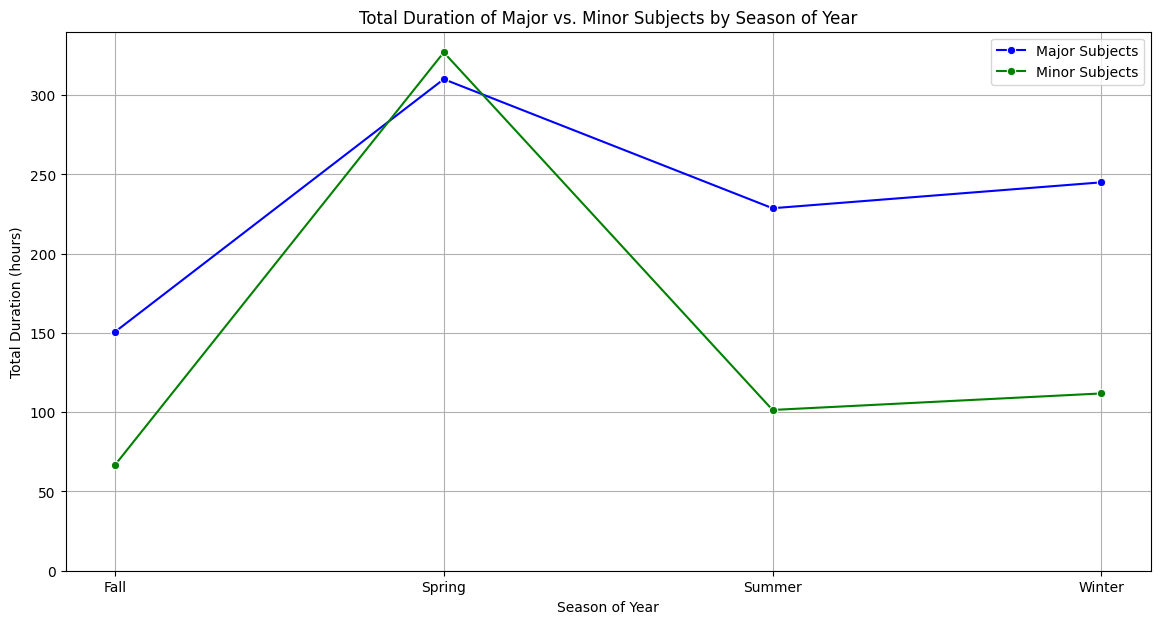

In [ ]:
major_weekly_duration = major_df.groupby('season_of_year')['duration_hours'].sum()
minor_weekly_duration = minor_df.groupby('season_of_year')['duration_hours'].sum()

plt.figure(figsize=(14, 7))
sns.lineplot(x=major_weekly_duration.index, y=major_weekly_duration.values, marker='o', color='blue', label='Major Subjects')
sns.lineplot(x=minor_weekly_duration.index, y=minor_weekly_duration.values, marker='o', color='green', label='Minor Subjects')
plt.title('Total Duration of Major vs. Minor Subjects by Season of Year')
plt.xlabel('Season of Year')
plt.ylabel('Total Duration (hours)')
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()

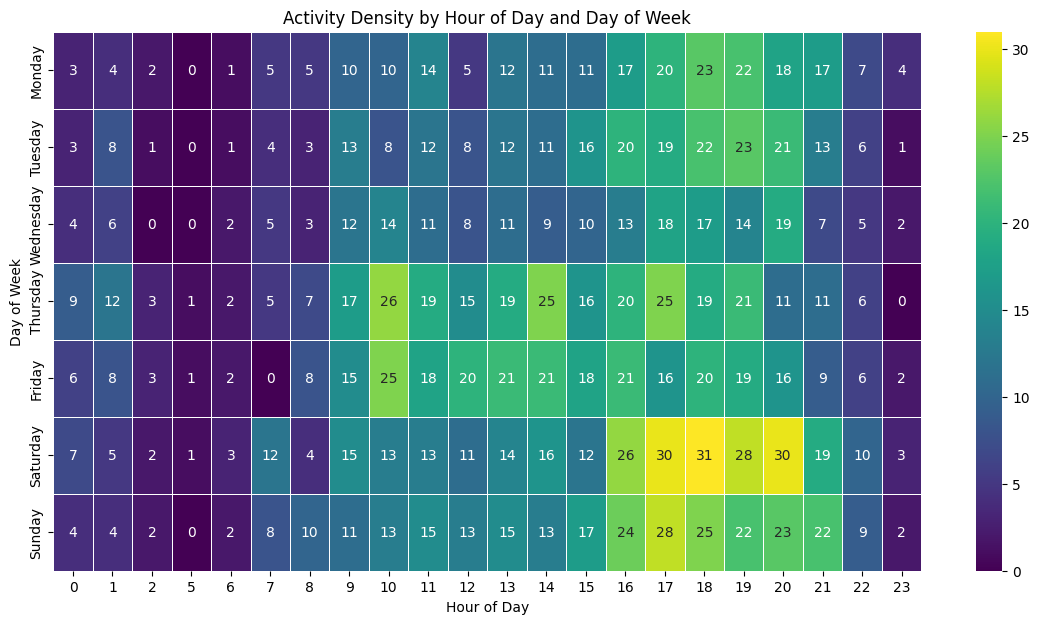

In [ ]:

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(index='day_of_week', columns='hour_of_day', aggfunc='size', fill_value=0)

# Order the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(day_order)

# Plotting
plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5, annot=True, fmt="d")
plt.title('Activity Density by Hour of Day and Day of Week')
plt.ylabel('Day of Week')
plt.xlabel('Hour of Day')
plt.show()


<ipython-input-28-9d968dbc871f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_duration = df.groupby('category')['duration_hours'].mean().reset_index()
<ipython-input-28-9d968dbc871f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='duration_hours', data=category_duration, palette='viridis')


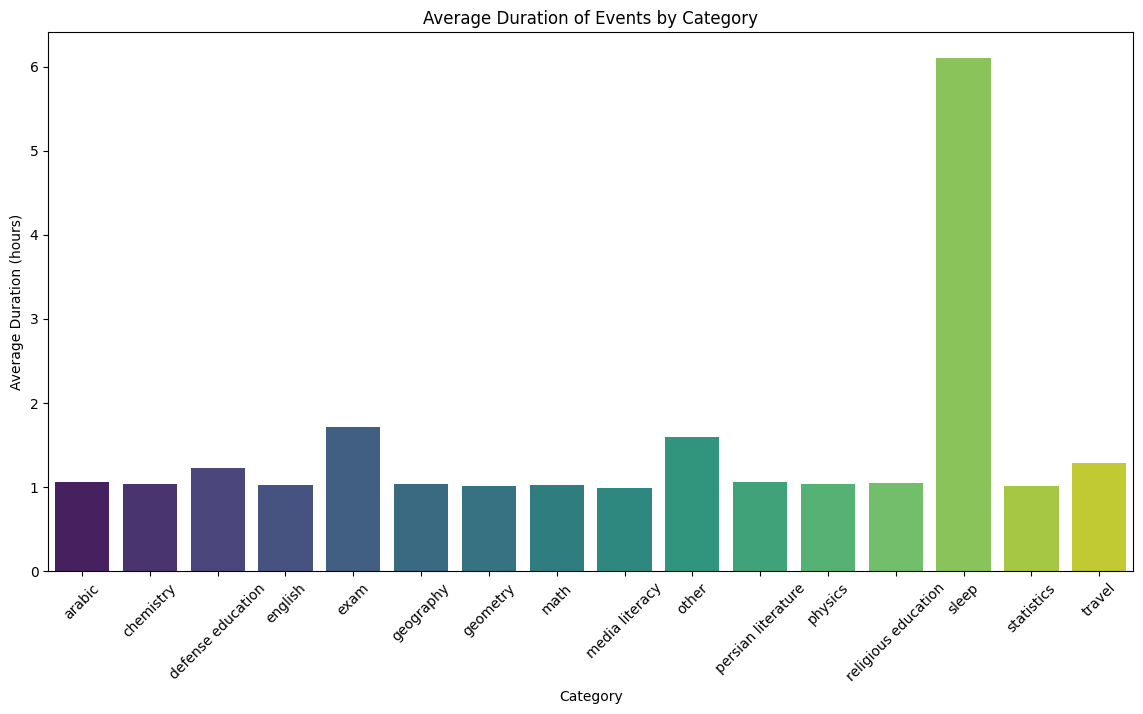

In [ ]:
category_duration = df.groupby('category')['duration_hours'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='category', y='duration_hours', data=category_duration, palette='viridis')
plt.title('Average Duration of Events by Category')
plt.xlabel('Category')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-eb440d671225>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_of_year', y='duration_hours', data=month_duration, palette='viridis')


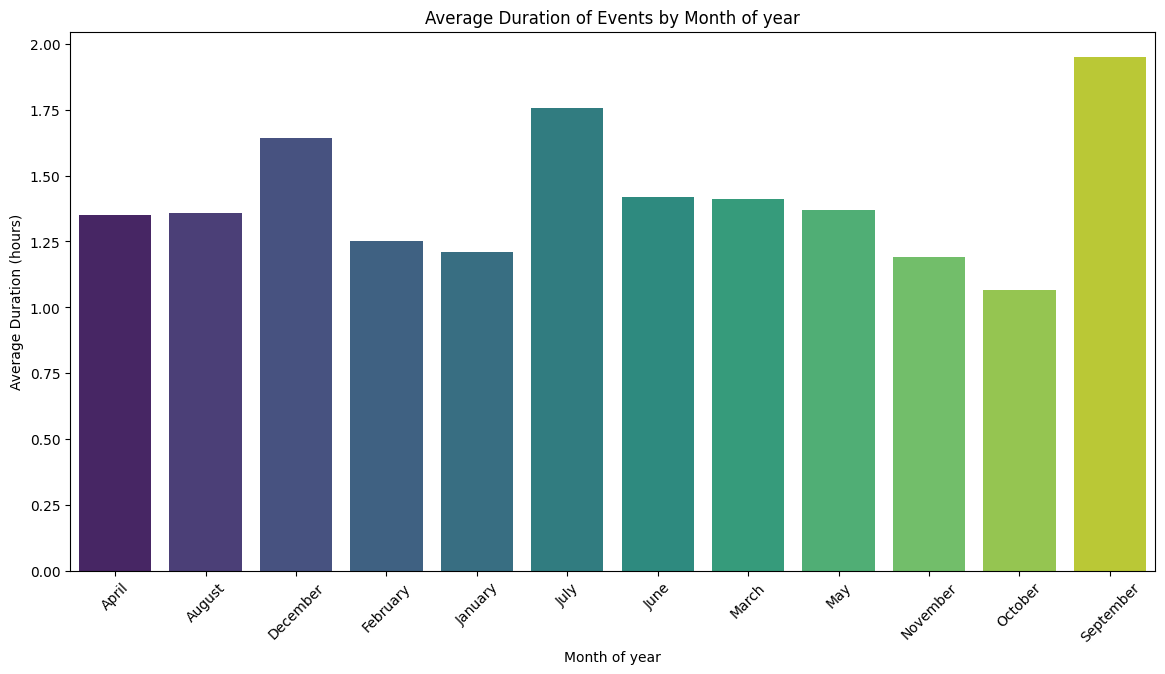

In [ ]:
month_duration = df.groupby('month_of_year')['duration_hours'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='month_of_year', y='duration_hours', data=month_duration, palette='viridis')
plt.title('Average Duration of Events by Month of year')
plt.xlabel('Month of year')
plt.ylabel('Average Duration (hours)')
plt.xticks(rotation=45)
plt.show()

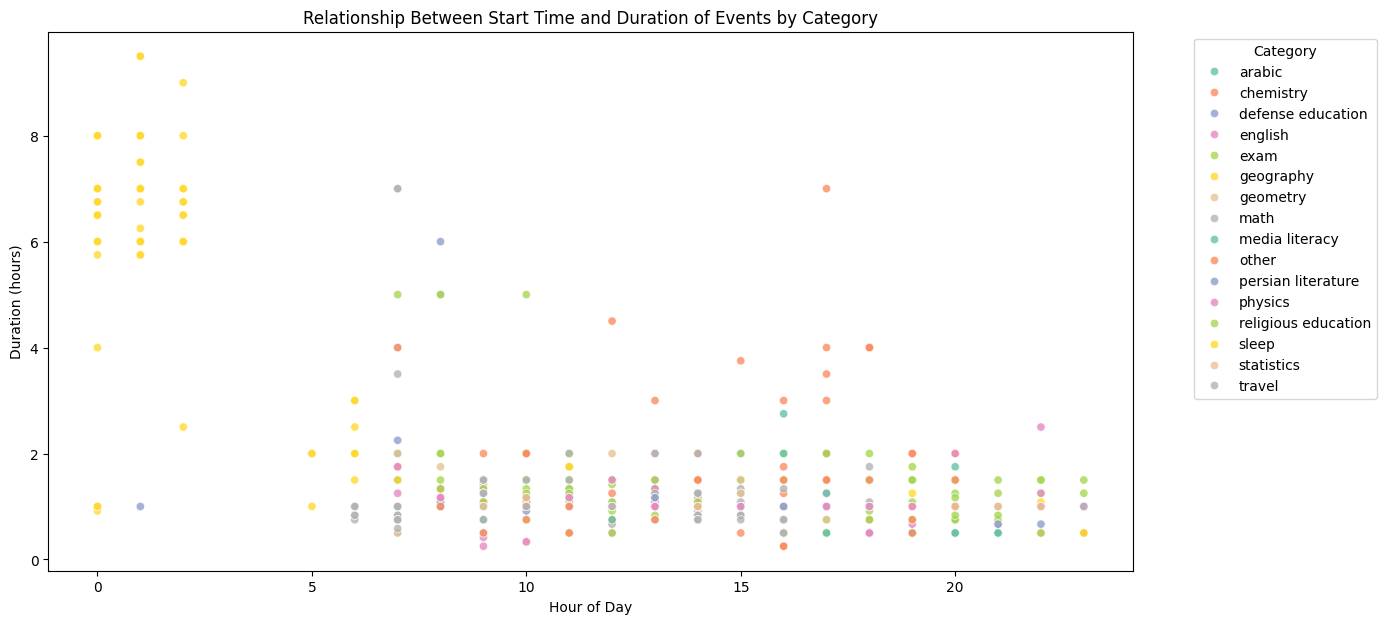

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='hour_of_day', y='duration_hours', hue='category', data=df, palette='Set2', alpha=0.8)
plt.title('Relationship Between Start Time and Duration of Events by Category')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (hours)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

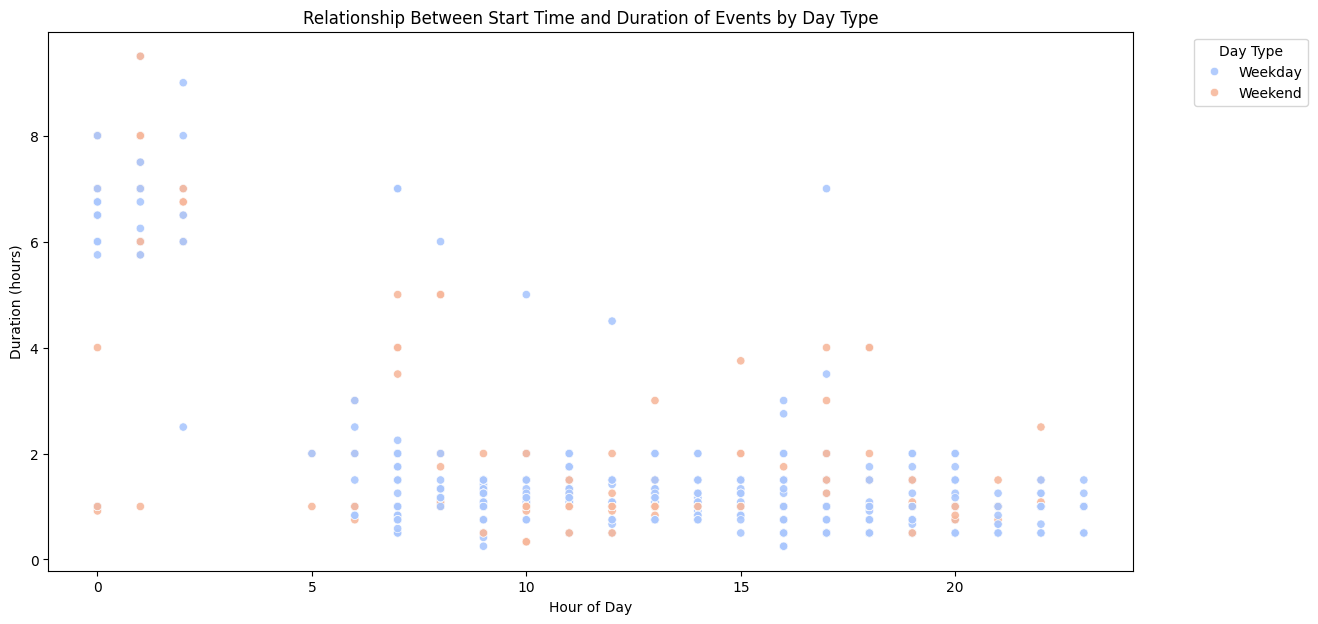

In [ ]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x='hour_of_day', y='duration_hours', hue='day_type', data=df, palette='coolwarm', alpha=0.9)
plt.title('Relationship Between Start Time and Duration of Events by Day Type')
plt.xlabel('Hour of Day')
plt.ylabel('Duration (hours)')
plt.legend(title='Day Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

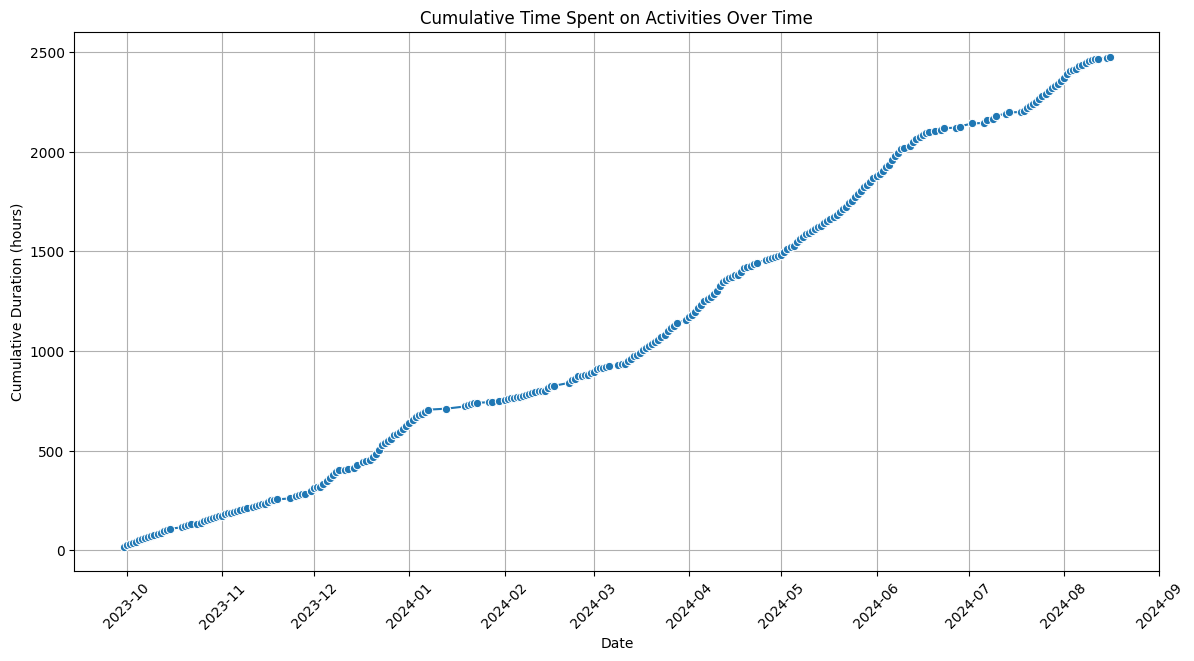

In [ ]:
# Prepare the data: Group by date, sum durations, and calculate the cumulative sum
df['date'] = df['begin'].dt.date  # Extract date from begin datetime
daily_duration = df.groupby('date')['duration_hours'].sum().cumsum().reset_index()

# Plot using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='duration_hours', data=daily_duration, marker='o')
plt.title('Cumulative Time Spent on Activities Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Duration (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

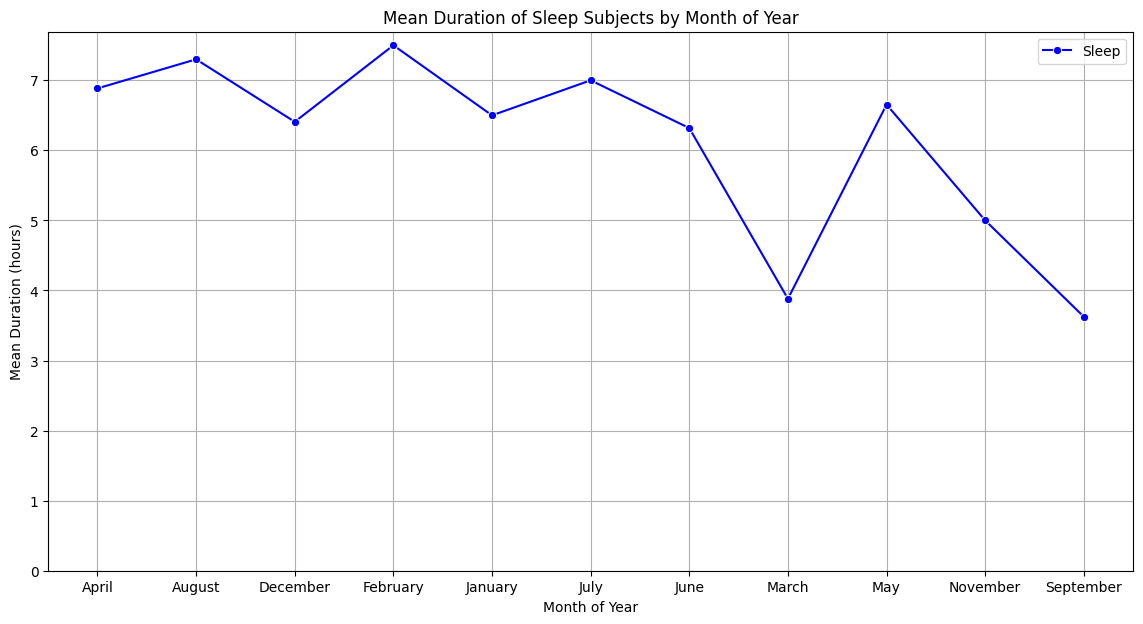

In [ ]:
sleep_df = df[df['category'] == 'sleep']
sleep_monthly_duration = sleep_df.groupby('month_of_year')['duration_hours'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=sleep_monthly_duration.index, y=sleep_monthly_duration.values, marker='o', color='blue', label='Sleep')
plt.title('Mean Duration of Sleep Subjects by Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Mean Duration (hours)')
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()

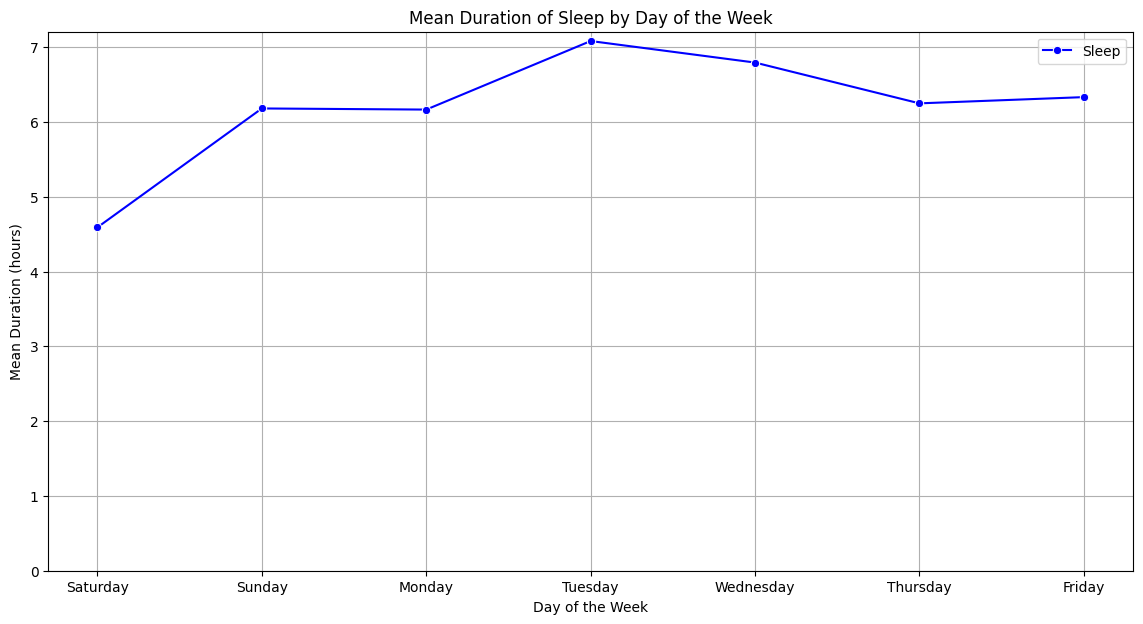

In [ ]:
sleep_weekly_duration = sleep_df.groupby('day_of_week')['duration_hours'].mean()

sleep_weekly_duration = sleep_weekly_duration.reindex(days_order)

plt.figure(figsize=(14, 7))
sns.lineplot(x=sleep_weekly_duration.index, y=sleep_weekly_duration.values, marker='o', color='blue', label='Sleep')
plt.title('Mean Duration of Sleep by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Duration (hours)')
plt.grid(True)
plt.ylim(ymin=0)
plt.legend()
plt.show()